In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
width = 28; height=28
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape:',X_test,Y_test)

학습후 테스트 데이터 shape: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 1000x300 with 0 Axes>

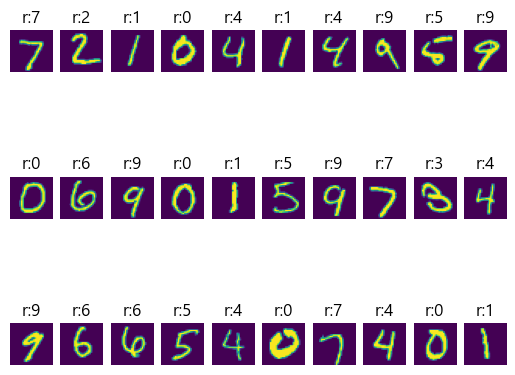

In [4]:
#모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row=3
plt_col=10
plt.figure(figsize=(plt_col,plt_row))
plt.rc('font',family='Malgun Gothic')
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)
for i in range(plt_row *plt_col):
    # X_test[i]를 axarr[적절한 곳]에 출력(imshow) Y_test[i].argmax()의 실제값을 title에 출력
    sub_plot=axarr[i//plt_col,i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width,height))
    #sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('r:' + str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

학습후 테스트 데이터 shape: (10000, 784) (10000, 10) (10000, 784) (10000, 10) (50000, 784) (50000, 10)
Epoch 1/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2427 - accuracy: 0.9283 - val_loss: 0.1277 - val_accuracy: 0.9612
Epoch 2/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 3/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0951 - val_accuracy: 0.9724
Epoch 4/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0760 - val_accuracy: 0.9774
Epoch 5/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0774 - val_accuracy: 0.9770
Epoch 6/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0863 - val_accuracy: 0.9756
Epoch 7/300
1000/1000 [=============

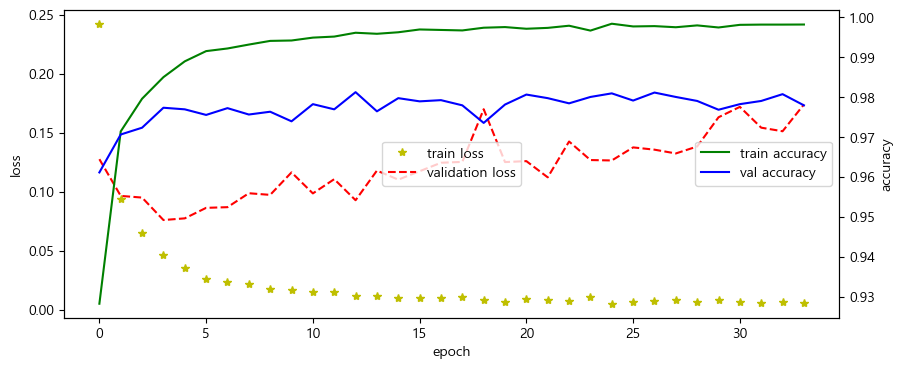

In [5]:
width = 28; height=28
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width*height).astype('float32')/255.0
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape:',X_test.shape,Y_test.shape,X_val.shape,Y_val.shape,X_train.shape,Y_train.shape,)

# 2. 모델 구성
model=Sequential()
model.add(Input(shape=(width*height, )))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 3. 학습과정 설정
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train,Y_train,
                epochs=300, batch_size=50,
                validation_data=(X_val,Y_val),
                callbacks=[early_stop])

#5. 학습과정 살펴보기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()


In [6]:
loss,acc = model.evaluate(X_test,Y_test)
loss,acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1827 - accuracy: 0.9773


(0.18271057307720184, 0.9772999882698059)

In [8]:
# 성능평가지표 = 교차표
yhat = model.predict(X_test).argmax(axis = 1) # 예측치
# print('예측치:', yhat)
# print('실제값:', np.argmax(Y_test, axis = 1))
print('실제값:', y_test)
pd.crosstab(yhat, y_test)

313/313 [==============================] - 1s 2ms/step
실제값: [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,968,0,1,0,1,1,6,0,0,1
1,1,1121,0,0,0,0,3,4,1,1
2,1,4,1011,6,4,1,2,7,1,1
3,2,0,5,986,0,24,1,1,8,0
4,1,0,1,0,944,0,1,0,1,3
5,3,0,0,4,0,851,4,0,2,0
6,0,1,1,0,2,3,933,0,0,0
7,1,1,8,6,2,0,1,1007,2,6
8,2,7,4,4,1,6,7,3,956,1


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat)

array([[ 968,    1,    1,    2,    1,    3,    0,    1,    2,    1],
       [   0, 1121,    4,    0,    0,    0,    1,    1,    7,    1],
       [   1,    0, 1011,    5,    1,    0,    1,    8,    4,    1],
       [   0,    0,    6,  986,    0,    4,    0,    6,    4,    4],
       [   1,    0,    4,    0,  944,    0,    2,    2,    1,   28],
       [   1,    0,    1,   24,    0,  851,    3,    0,    6,    6],
       [   6,    3,    2,    1,    1,    4,  933,    1,    7,    0],
       [   0,    4,    7,    1,    0,    0,    0, 1007,    3,    6],
       [   0,    1,    1,    8,    1,    2,    0,    2,  956,    3],
       [   1,    1,    1,    0,    3,    0,    0,    6,    1,  996]],
      dtype=int64)

In [10]:
cnt =0 
for i, row in enumerate(confusion_matrix(y_test,yhat)):
    for j,data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수:',cnt)

예측이 틀린 갯수: 227


In [15]:
# y_hat : 예측치
# y_test : 실제값
cnt=0
for y,h in zip(y_test,yhat):
    if y!=h:
        cnt+= 1
print('예측이 틀린 갯수:',cnt)

예측이 틀린 갯수: 227


i =  2996
cnt =  100


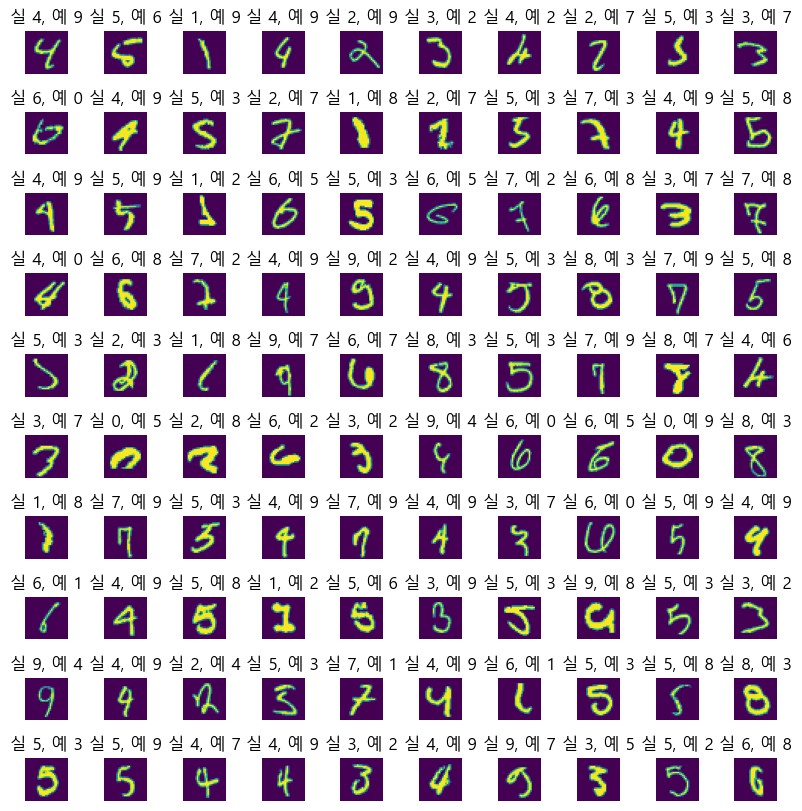

In [33]:
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat , y_test 를 엑세스 할 index
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = f'실 {y_test[i]}, 예 {yhat[i]}'
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)

# CNN
- 컨볼류션 레이어 -> max pooling(추상화한다)-> DNN (교안 35pt)


In [41]:
width = 28; height=28
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width, height, 1).astype('float32') / 255.0
X_test = X_test.reshape(10000, width, height, 1).astype('float32') / 255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape:',X_test.shape,Y_test.shape,X_val.shape,Y_val.shape,X_train.shape,Y_train.shape,)
# 모델 생성
# (Conv(3*3 커널 32) 28*28)=> 26*26*32
# maxPooling(2*2 사이즈) 13*13*32
# Dropout
# Conv( 3*3짜리 커널 64개) 11* 11*32*64
# maxpooling(2*2 사이즈) 6*6*32*64
# 1차원 데이터로 만들기
# DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32,# 커널 갯수
                 3, # 커널사이즈
                 padding='same',
                 activation='relu',
                 input_shape=(width,height,1)
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))
model.summary()

학습후 테스트 데이터 shape: (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10) (50000, 28, 28, 1) (50000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
        

In [42]:
# 학습설정
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
# 학습시키기
earlystop = EarlyStopping(patience=20)
hist= model.fit(X_train,Y_train,
               epochs=50,
               batch_size=32,
               validation_data=(X_val,Y_val),
                callbacks=(early_stop))

Epoch 1/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2544 - accuracy: 0.9223 - val_loss: 0.0511 - val_accuracy: 0.9855
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0945 - accuracy: 0.9723 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0730 - accuracy: 0.9781 - val_loss: 0.0386 - val_accuracy: 0.9893
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0333 - val_accuracy: 0.9915
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0337 - val_accuracy: 0.9904
Epoch 6/50
1563/1563 [==============================] - 30s 20ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0350 - val_accuracy: 0.9916
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0375 -

In [44]:
model.save('model/mnist_cnn.h5')

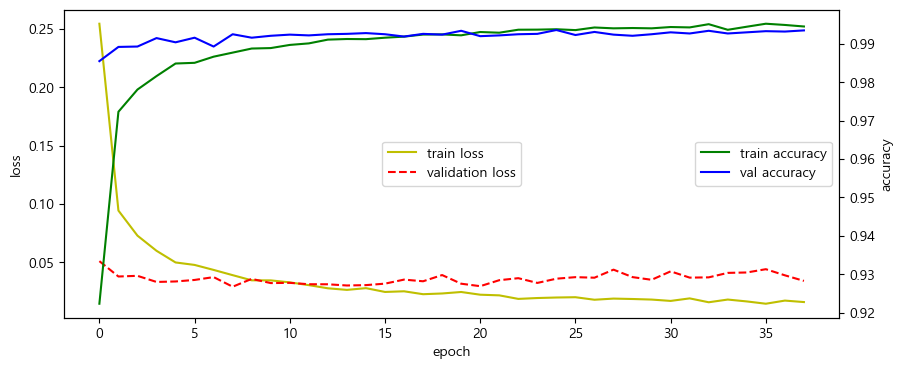

In [45]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [47]:
# 평가하기 
loss, accuracy = model.evaluate(X_val, Y_val)
loss,accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.0342 - accuracy: 0.9935


(0.03422970324754715, 0.9934999942779541)

In [49]:
# 예측치와 실제 값을 이용해서 교차표 만들기
yhat = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test,yhat)

313/313 [==============================] - 2s 5ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,979,0,0,0,0,0,0,1,0,0
1,0,1134,0,1,0,0,0,0,0,0
2,1,1,1026,0,0,0,0,4,0,0
3,0,1,0,1004,0,4,0,0,1,0
4,0,0,0,0,979,0,0,0,2,1
5,2,0,0,5,0,884,1,0,0,0
6,3,1,0,0,2,3,949,0,0,0
7,0,3,1,0,0,0,0,1021,1,2
8,1,1,0,1,0,0,1,0,969,1


In [50]:
cnt = 0
for y,h in zip(y_test,yhat):
    if y!=h:
        cnt+=1
print('예측이 틀린 갯수:',cnt)

예측이 틀린 갯수: 59


i =  10000
cnt =  59


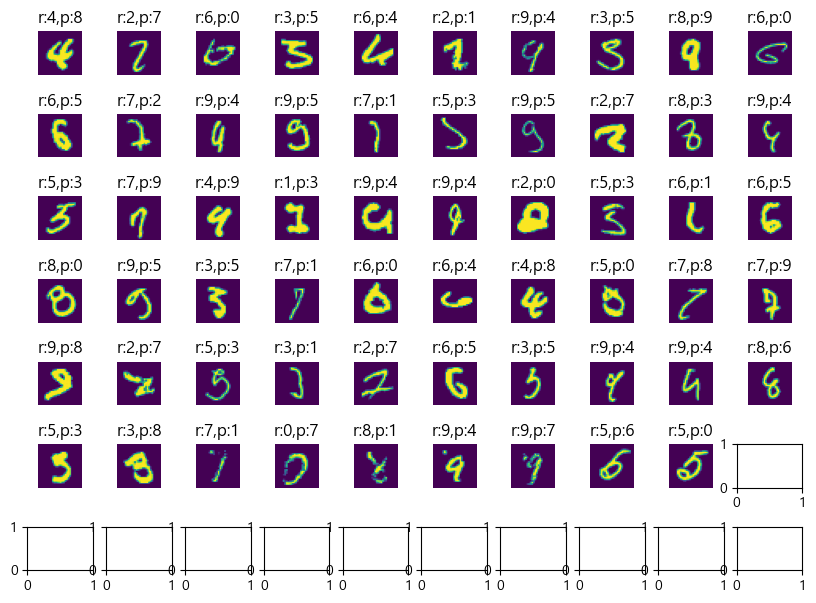

In [51]:
plt_row = 7
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat , y_test 를 엑세스 할 index
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'r:{},p:{}'.format(y_test[i],yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i = ', i)
print('cnt = ', cnt)